In [2]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS

In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# knn model
from sklearn.neighbors import KNeighborsRegressor

# decision tree model
from sklearn.tree import DecisionTreeRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [39]:
df_train = pd.read_csv('data/train.csv')
df_test_true = pd.read_csv('data/test.csv')
print("df_train shape:"+str(df_train.shape) )
print("df_test_true shape:"+str(df_test_true.shape) )

df_train shape:(51000, 29)
df_test_true shape:(23111, 28)


In [5]:
print(df_train.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [6]:
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [7]:
# print(df_train.isnull().sum())
# no blanks

In [84]:
df_train['id'].dtype

dtype('int64')

# Feature Engineering 

#### Modify Columns names 

In [8]:
df_train[(df_train['zipcode'] == '95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n94158')]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
5890,18915873,4.65396,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",1,1.0,Real Bed,flexible,True,...,37.773742,-122.391503,San Francisco Luxury,Mission Bay,5,95.0,https://a0.muscache.com/im/pictures/13f8dcaa-e...,95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\...,1.0,1.0


In [9]:
df_train[(df_train['zipcode'] == ' ')]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
50482,19864701,4.317488,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,...,38.936838,-76.993548,Stylish Midrise Steps from Metro,NaN,25,88.0,https://a0.muscache.com/im/pictures/2f7dbb0b-a...,,1.0,1.0


In [10]:
print(df_train[(df_train['zipcode'] == '95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n94158')]['zipcode'])
print(df_train[(df_train['zipcode'] == ' ')]['zipcode'])
# print(df_train[(df_train.id == 18915873)]['zipcode'])

#overwrite '95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n94158'
# Ref.: https://www.dataquest.io/blog/settingwithcopywarning/
df_train.loc[df_train.id == 18915873,'zipcode'] = '95202_94158'
df_train.loc[df_train.id == 19864701,'zipcode'] = 'blank_over'

print(df_train[(df_train.id == 18915873)]['zipcode'])
print(df_train[(df_train.id == 19864701)]['zipcode'])

5890    95202\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n\r\r\r\r\...
Name: zipcode, dtype: object
50482     
Name: zipcode, dtype: object
5890    95202_94158
Name: zipcode, dtype: object
50482    blank_over
Name: zipcode, dtype: object


### Missing values

In [11]:
# handle missing values

df_train = df_train.fillna(0.0) 
print(df_train.shape)

(51000, 29)


probably not a good idea for 'review_scores_rating' 
as it fill empty reviews with 0 when the actual review score is unknown

### Adding Zipcodes 

In [12]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS

# zipcode to numerical columns
df_zipcode_1 = pd.get_dummies(df_train['zipcode'])
df = pd.concat([df_train, df_zipcode_1], axis=1).fillna(0.0)

print(list(df_zipcode_1.columns))
print('')
print(list(df.columns))

[0.0, '02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02134', '02135', '02136', '02138', '02139', '02145', '02152', '02186', '02199', '02210', '02215', '02445', '02446', '02467', '07306', '10000', '10001', '10001.0', '10002', '10002.0', '10003', '10003-8623', '10003.0', '10004', '10004.0', '10005', '10006', '10007', '10009', '10009.0', '10010', '10010.0', '10011', '10011.0', '10012', '10012.0', '10013', '10013.0', '10014', '10014.0', '10016', '10017', '10018', '10018.0', '10019', '10019.0', '10021', '10022', '10023', '10024', '10025', '10026', '10026.0', '10027', '10027.0', '10028', '10029', '10029.0', '10030', '10031', '10032', '10033', '10034', '10035', '10035.0', '10036', '10036.0', '10037', '10037.0', '10038', '10038.0', '10039', '10040', '10044', '10048', '10065', '10069', '10075', '10106', '10118', '10119.0', '10128', '10128.0', '1

In [13]:
df_zipcode_1.dtypes

0.0            uint8
02108          uint8
02109          uint8
02110          uint8
02111          uint8
02113          uint8
02114          uint8
02115          uint8
02116          uint8
02118          uint8
02119          uint8
02120          uint8
02121          uint8
02122          uint8
02124          uint8
02125          uint8
02126          uint8
02127          uint8
02128          uint8
02129          uint8
02130          uint8
02131          uint8
02132          uint8
02134          uint8
02135          uint8
02136          uint8
02138          uint8
02139          uint8
02145          uint8
02152          uint8
               ...  
94108          uint8
94109          uint8
94109.0        uint8
94110          uint8
94111          uint8
94112          uint8
94114          uint8
94114.0        uint8
94115          uint8
94115.0        uint8
94116          uint8
94117          uint8
94117.0        uint8
94118          uint8
94118.0        uint8
94121          uint8
94122        

In [14]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,94127,94129,94130,94131,94132,94133,94134,94158,95202_94158,blank_over
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS

# select the columns
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating'] + list(df_zipcode_1.columns)
# X input for model

y_column = ['log_price']
# measured output Y

print(X_columns)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 0.0, '02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02127', '02128', '02129', '02130', '02131', '02132', '02134', '02135', '02136', '02138', '02139', '02145', '02152', '02186', '02199', '02210', '02215', '02445', '02446', '02467', '07306', '10000', '10001', '10001.0', '10002', '10002.0', '10003', '10003-8623', '10003.0', '10004', '10004.0', '10005', '10006', '10007', '10009', '10009.0', '10010', '10010.0', '10011', '10011.0', '10012', '10012.0', '10013', '10013.0', '10014', '10014.0', '10016', '10017', '10018', '10018.0', '10019', '10019.0', '10021', '10022', '10023', '10024', '10025', '10026', '10026.0', '10027', '10027.0', '10028', '10029', '10029.0', '10030', '10031', '10032', '10033', '10034', '10035', '10035.0', '10036', '10036.0', '10037', '10037.0', '10038', '10038.0', '10039', '10040', '10044', '10048', '1006

# Model Training

In [16]:
# threshold = 0.8 
# 80% for train, 20% for test

threshold = 0.8

X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape) #df_train, X_train
print('y_train', y_train.shape) #df_train, y_train
print('X_test', X_test.shape) # X_test
print('y_test', y_test.shape) # y_test

X_train (40800, 738)
y_train (40800, 1)
X_test (10200, 738)
y_test (10200, 1)


### Train a linear regression 

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))

MAE 0.36


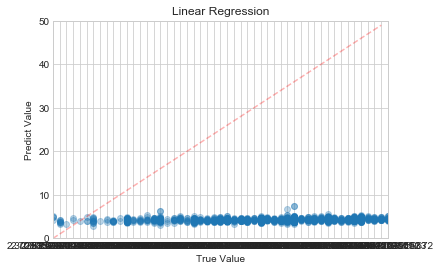

In [18]:
plt.scatter(y_test, y_pred, alpha=0.3)

plt.plot(range(0,50, 1), range(0,50, 1), '--r', alpha=0.3, label='Line1')

plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.show()

In [19]:
#calculate the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.47926653542881664

### Train a KNN

In [20]:
model = KNeighborsRegressor(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))

MAE 0.38


### Train a Decision Tree 

In [21]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))

MAE 0.4


# Experiments

Linear Regression
MAE 0.3595027865201946
RMSE 0.47926653542881664


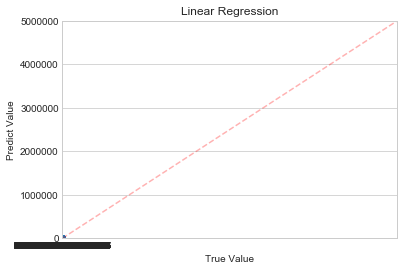


KNN 5
MAE 0.3901836241641606
RMSE 0.5123550845309529


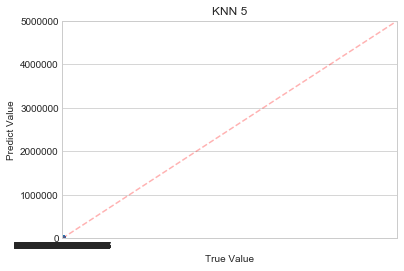


KNN 2
MAE 0.4206414178890558
RMSE 0.5583588137948596


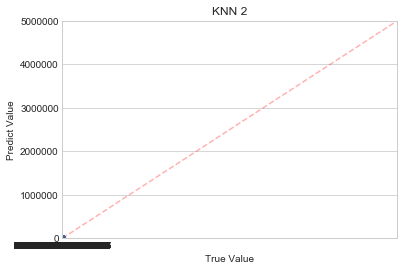


Decision Tree
MAE 0.39648701856241475
RMSE 0.5362826552244069


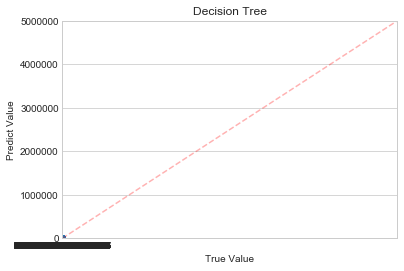

C:\Users\outpost\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest 10
MAE 0.36170279119053544
RMSE 0.48546232270911693


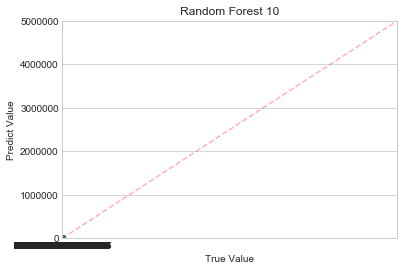

C:\Users\outpost\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest 100
MAE 0.3560833509163409
RMSE 0.47742419709491046


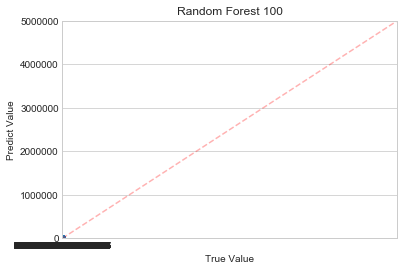

In [22]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS/blob/master/week5/regression-house-sklearn-ext-class-version.ipynb

def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)



# Error Analysis

In [23]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS/blob/master/week5/regression-house-sklearn-ext-class-version.ipynb

model = RandomForestRegressor(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\outpost\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [24]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
2,bedrooms,3.228161e-01
0,accommodates,1.137540e-01
1,bathrooms,8.030878e-02
4,review_scores_rating,7.028475e-02
3,beds,2.697019e-02
66,10014,6.937203e-03
62,10012,5.572460e-03
61,10011.0,5.146739e-03
72,10019,4.987729e-03
93,10036,4.786627e-03


In [25]:
df_test = pd.DataFrame(X_test).copy()
df_test['price'] = y_test
df_test['prediction'] = y_pred
df_test['abs_error'] = abs(df_test['price']-df_test['prediction'])
df_test.sort_values(by='abs_error', ascending=False).round()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,0.0,02108,02109,02110,02111,...,94131,94132,94133,94134,94158,95202_94158,blank_over,price,prediction,abs_error
6139,1,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,4.0,3.0
21939,1,1.0,1.0,1.0,68.0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.0,3.0,3.0
5766,10,2.0,8.0,8.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,6.0,3.0
43122,1,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,4.0,3.0
23352,1,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,5.0,3.0
6981,4,1.0,2.0,2.0,80.0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,5.0,3.0
5391,1,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,4.0,3.0
4172,1,1.0,3.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,4.0,3.0
22106,3,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,5.0,3.0
37795,2,2.0,1.0,1.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,4.0,3.0


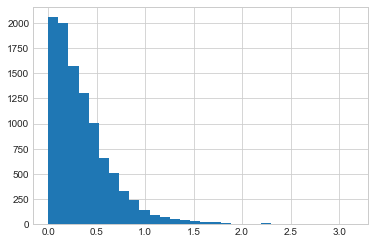

In [26]:
plt.hist(df_test['abs_error'], bins=30)
plt.show()

In [27]:
df_error = df_test[df_test['abs_error']>0]
df_error

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,0.0,02108,02109,02110,02111,...,94131,94132,94133,94134,94158,95202_94158,blank_over,price,prediction,abs_error
17082,3,1.0,1.0,1.0,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.666427,5.481609,0.184818
31898,2,1.0,1.0,1.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.605170,4.866005,0.260835
44280,1,1.0,1.0,1.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.499810,4.335832,0.163977
47755,4,1.0,1.0,3.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.477337,4.988729,0.511392
38423,2,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.787492,5.357191,0.569700
21156,2,1.0,1.0,1.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.192957,4.866005,0.326951
40018,4,1.0,2.0,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.616771,4.551804,1.064967
35613,2,1.0,1.0,1.0,90.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.234107,4.622121,0.388015
10367,6,2.0,2.0,3.0,98.0,0,0,1,0,0,...,0,0,0,0,0,0,0,6.396930,5.465325,0.931605
15934,1,1.0,1.0,1.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.828314,4.490132,0.338182


In [28]:
df_error.describe()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,0.0,02108,02109,02110,02111,...,94131,94132,94133,94134,94158,95202_94158,blank_over,price,prediction,abs_error
count,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,...,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000,10200.0,10200.000000,10200.000000,1.020000e+04
mean,3.143824,1.232892,1.265098,1.702549,73.366569,0.010784,0.001078,0.001176,0.000196,0.002255,...,0.003333,0.001275,0.002353,0.001765,0.000490,0.000098,0.0,4.777670,4.765734,3.564639e-01
std,2.162712,0.591514,0.877493,1.277604,39.575793,0.103291,0.032823,0.034281,0.014002,0.047435,...,0.057642,0.035679,0.048452,0.041973,0.022136,0.009901,0.0,0.713171,0.576296,3.184484e-01
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.302585,2.708050,6.661338e-15
25%,2.000000,1.000000,1.000000,1.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.304065,4.340746,1.279603e-01
50%,2.000000,1.000000,1.000000,1.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.700480,4.714170,2.763341e-01
75%,4.000000,1.000000,1.000000,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.192957,5.116191,4.898281e-01
max,16.000000,8.000000,10.000000,16.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.600402,7.301074,3.138408e+00


In [29]:
df_error.corr()['abs_error'].dropna().sort_values()

review_scores_rating   -0.182661
11221                  -0.035082
90038                  -0.030967
90028                  -0.028078
11377                  -0.028024
90012                  -0.024684
90066                  -0.023860
90019                  -0.023632
10026                  -0.023464
11206                  -0.023048
90005                  -0.020920
10031                  -0.020753
90029                  -0.019782
11238                  -0.019089
11211.0                -0.018904
11206.0                -0.018600
11101                  -0.018384
90232                  -0.018242
91364                  -0.018226
90245                  -0.017903
94109.0                -0.017312
11215                  -0.017193
94110                  -0.017143
11422                  -0.016897
90291                  -0.016655
91206                  -0.016632
90018                  -0.016439
02131                  -0.016401
60661                  -0.016256
94112                  -0.016207
          

# Prepare submission

In [76]:
# add zipcode columns from Train to Test

#df_zipcode_2 = pd.get_dummies(df_test_true['zipcode'])
df_test_build = pd.concat([df_test_true, df_zipcode_1], axis=1)



# some columns for id are not used, as there are columns in Test that do not have unused due to a surplus of Zipcode columns

df_prediction = df_test_build[X_columns].fillna(0.0)

df_test_build['log_price'] = model.predict(df_prediction) # where model = RandomForestRegressor(100)


In [75]:
df_test_build[:23112][['id', 'log_price']]

,id,log_price
0,986942.0,4.010007
1,16436737.0,4.647601
2,18209634.0,4.036782
3,15027024.0,4.992076
4,18074243.0,5.080555
5,8446914.0,4.237737
6,19362916.0,5.322168
7,16116059.0,5.717177
8,20912583.0,4.031922
9,13573101.0,5.199982


In [47]:
df_test_build['id'].dtype

dtype('float64')

In [79]:
df_export = df_test_build[:23111][['id', 'log_price']]
df_export['id'].dtype

dtype('float64')

In [80]:
df_export

,id,log_price
0,986942.0,4.010007
1,16436737.0,4.647601
2,18209634.0,4.036782
3,15027024.0,4.992076
4,18074243.0,5.080555
5,8446914.0,4.237737
6,19362916.0,5.322168
7,16116059.0,5.717177
8,20912583.0,4.031922
9,13573101.0,5.199982


In [81]:
df_export['id'].dtype

dtype('float64')

In [91]:
# Ref. : https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
df_export['id'] = df_export['id'].astype(np.int64)
df_export['id'].dtype

dtype('int64')

In [93]:
df_export.to_csv('submission_modified_240419.csv', index=False)

# Cross Validation

In [32]:
# Ref.: https://github.com/arybressane/CEBD1260-BIG-DATA-ANALYTICS

In [33]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
     print('MODEL', m[0])
     results[m[0]] = {'mae':[], 'rmse':[]}
     kf = KFold(n_splits=k)
     for train_index, test_index in kf.split(X):
         X_train_k, X_test_k = X.values[train_index], X.values[test_index]
         y_train_k, y_test_k = y.values[train_index], y.values[test_index]
        
         model = m[1]
         model.fit(X_train_k, y_train_k.ravel())
         y_pred = model.predict(X_test_k)
            
         mae = mean_absolute_error(y_test_k, y_pred)
         rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
            
         results[m[0]]['mae'].append(mae)
         results[m[0]]['rmse'].append(rmse)
            

MODEL LinearRegression


NameError: name 'KFold' is not defined

In [ ]:
for metric in ['mae', 'rmse']:
     values = []
     labels = []
     for model, result_values in results.items():
         for m, v in result_values.items():
             if m == metric:
                 labels.append(model)
                 values.append(v)
                    
     plt.figure(figsize=(12,6))
     plt.title(metric)
     plt.boxplot(values)
     plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
     plt.show()
    